In [1]:


"""
https://blog.csdn.net/wehung/article/details/89215211

"""

import numpy as np
import matplotlib.pyplot as plt
m =200 
X =np.random.randn(2,m) #产生2*200 高斯分布 均值为0 方差为1 
Y = (X[0,:]>0)*(X[1,:]>0)*1.0 + (X[0,:]<0)*(X[1,:]<0)


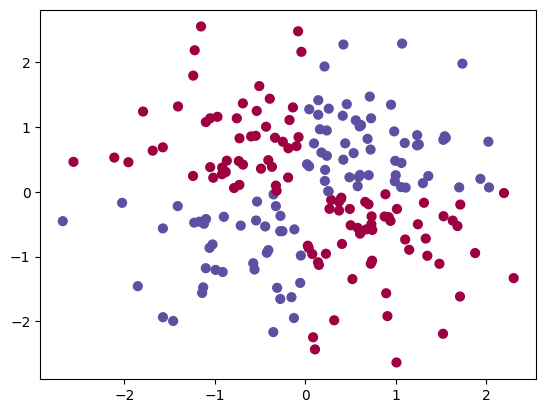

In [2]:
#可视化 jupyter notebook环境下
%matplotlib inline 
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap = plt.cm.Spectral) #**


In [3]:

import torch 
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import math
%matplotlib inline

import pandas as pd
xy = pd.read_csv('diabetes.csv',delimiter=',',dtype= np.float32)
#print(xy.head())
xy_numpy = xy.to_numpy() #pandas 转维numpy 为了后面numpy转tensor
x = xy_numpy[:,0:-1] # x为 768*8
y = xy_numpy[:,-1].reshape(-1,1) #为了让其shape为 768*1 ，而不是768

2 搭建多层神经网络
2.1 导入库
import torch 
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import math
%matplotlib inline
1
2
3
4
5
6
2.2 读取数据集
Pima-Indians-Diabetes数据集，github可搜到

import pandas as pd
xy = pd.read_csv('diabetes.csv',delimiter=',',dtype= np.float32)
#print(xy.head())
xy_numpy = xy.to_numpy() #pandas 转维numpy 为了后面numpy转tensor
x = xy_numpy[:,0:-1] # x为 768*8
y = xy_numpy[:,-1].reshape(-1,1) #为了让其shape为 768*1 ，而不是768
————————————————
版权声明：本文为CSDN博主「夜猫子科黎」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/wehung/article/details/89215211

In [4]:
x_data = torch.Tensor(torch.from_numpy(x)) #注意此处的Tensor 若由numpy转换过来 numpy的dtype须为np.float32或其他float类型
y_data = torch.Tensor(torch.from_numpy(y))
print(x_data.data.shape)
print(y_data.data.shape)
# torch.Size([768, 8])
# torch.Size([768, 1])


torch.Size([768, 8])
torch.Size([768, 1])


In [5]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        # 定义多层神经网络
        self.fc1 = torch.nn.Linear(8,6)
        self.fc2 = torch.nn.Linear(6,4)
        self.fc3 = torch.nn.Linear(4,1)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))            # 8->6  第一层：
        x = F.dropout(x,p=0.5)             #dropout 1 
        x = F.relu(self.fc2(x))            #-6->4   第二层
        x = F.dropout(x,p=0.5)             # dropout 2
        y_pred = torch.sigmoid(self.fc3(x))         # 4->1 ->sigmoid  第三层+sigmoid层
        # warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead."
        return y_pred


In [6]:
def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear')!= -1:
        print("hi")
        m.weight.data = torch.randn(m.weight.data.size()[0],m.weight.data.size()[1])
        m.bias.data = torch.randn(m.bias.data.size()[0])
model = Model()
model.apply(weight_init)


criterion  = torch.nn.BCELoss() #定义损失函数 binary corsstropy
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01) #学习率设置为0.01,学习率为超参数 ，可以自己设置
Loss = []
print(x.shape)


max_tc = 2**11
for epoch in range(max_tc):
    y_pred = model(x_data)
    #计算误差
    loss = criterion(y_pred,y_data)
    #
    #prin(loss.item())
    Loss.append(loss.item())
    #每迭代1000次打印Lost并记录
    if epoch%2*6 == 0:
        print('[%d, %5d] loss: %.3f' %
                  (epoch, max_tc, loss.item()))
    #梯度清零
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #更新梯度
    optimizer.step()


hi
hi
hi
(768, 8)
[0,  2048] loss: 17.226
[2,  2048] loss: 14.607
[4,  2048] loss: 16.539
[6,  2048] loss: 14.941
[8,  2048] loss: 14.469
[10,  2048] loss: 15.847
[12,  2048] loss: 15.183
[14,  2048] loss: 16.834
[16,  2048] loss: 16.219
[18,  2048] loss: 15.884
[20,  2048] loss: 15.287
[22,  2048] loss: 15.748
[24,  2048] loss: 15.661
[26,  2048] loss: 15.638
[28,  2048] loss: 16.374
[30,  2048] loss: 16.746
[32,  2048] loss: 14.794
[34,  2048] loss: 14.590
[36,  2048] loss: 15.603
[38,  2048] loss: 14.337
[40,  2048] loss: 14.616
[42,  2048] loss: 13.972
[44,  2048] loss: 14.307
[46,  2048] loss: 14.296
[48,  2048] loss: 13.134
[50,  2048] loss: 12.433
[52,  2048] loss: 13.299
[54,  2048] loss: 14.040
[56,  2048] loss: 12.779
[58,  2048] loss: 12.774
[60,  2048] loss: 14.877
[62,  2048] loss: 13.263
[64,  2048] loss: 14.453
[66,  2048] loss: 14.019
[68,  2048] loss: 14.595
[70,  2048] loss: 13.139
[72,  2048] loss: 14.824
[74,  2048] loss: 14.714
[76,  2048] loss: 15.526
[78,  2048] 

[708,  2048] loss: 0.663
[710,  2048] loss: 0.679
[712,  2048] loss: 0.674
[714,  2048] loss: 0.690
[716,  2048] loss: 0.699
[718,  2048] loss: 0.705
[720,  2048] loss: 0.693
[722,  2048] loss: 0.671
[724,  2048] loss: 0.678
[726,  2048] loss: 0.694
[728,  2048] loss: 0.699
[730,  2048] loss: 0.693
[732,  2048] loss: 0.681
[734,  2048] loss: 0.679
[736,  2048] loss: 0.762
[738,  2048] loss: 0.707
[740,  2048] loss: 0.691
[742,  2048] loss: 0.682
[744,  2048] loss: 0.668
[746,  2048] loss: 0.716
[748,  2048] loss: 0.707
[750,  2048] loss: 0.690
[752,  2048] loss: 0.679
[754,  2048] loss: 0.686
[756,  2048] loss: 0.697
[758,  2048] loss: 0.665
[760,  2048] loss: 0.688
[762,  2048] loss: 0.691
[764,  2048] loss: 0.678
[766,  2048] loss: 0.683
[768,  2048] loss: 0.695
[770,  2048] loss: 0.677
[772,  2048] loss: 0.698
[774,  2048] loss: 0.753
[776,  2048] loss: 0.673
[778,  2048] loss: 0.706
[780,  2048] loss: 0.691
[782,  2048] loss: 0.672
[784,  2048] loss: 0.700
[786,  2048] loss: 0.678


[1448,  2048] loss: 0.632
[1450,  2048] loss: 0.650
[1452,  2048] loss: 0.645
[1454,  2048] loss: 0.641
[1456,  2048] loss: 0.650
[1458,  2048] loss: 0.644
[1460,  2048] loss: 0.644
[1462,  2048] loss: 0.651
[1464,  2048] loss: 0.656
[1466,  2048] loss: 0.644
[1468,  2048] loss: 0.644
[1470,  2048] loss: 0.644
[1472,  2048] loss: 0.648
[1474,  2048] loss: 0.657
[1476,  2048] loss: 0.650
[1478,  2048] loss: 0.657
[1480,  2048] loss: 0.654
[1482,  2048] loss: 0.642
[1484,  2048] loss: 0.655
[1486,  2048] loss: 0.659
[1488,  2048] loss: 0.660
[1490,  2048] loss: 0.666
[1492,  2048] loss: 0.650
[1494,  2048] loss: 0.652
[1496,  2048] loss: 0.665
[1498,  2048] loss: 0.649
[1500,  2048] loss: 0.656
[1502,  2048] loss: 0.664
[1504,  2048] loss: 0.658
[1506,  2048] loss: 0.649
[1508,  2048] loss: 0.662
[1510,  2048] loss: 0.661
[1512,  2048] loss: 0.655
[1514,  2048] loss: 0.659
[1516,  2048] loss: 0.646
[1518,  2048] loss: 0.650
[1520,  2048] loss: 0.671
[1522,  2048] loss: 0.638
[1524,  2048

In [7]:
for i in range(len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i] = 1.0
    else:
        y_pred[i] = 0.0
#print(y_pred)
type(y_pred)
(y_pred == y_data).sum().item()/len(y_data) # torch.Tensor.sum()函数


0.6510416666666666